# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
#Read train data
train_data=pd.read_csv("C:\\Users\\mansi khairnar\\Desktop\\my projects\\Handwritten digit recognition\\train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#No.of Train data's row and column
train_data.shape

(42000, 785)

In [6]:
#Read test data
test_data=pd.read_csv("C:\\Users\\mansi khairnar\\Desktop\\my projects\\Handwritten digit recognition\\test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#NO. of Test data's row and column
test_data.shape

(28000, 784)

Viewing a random data from train_data and check with its label

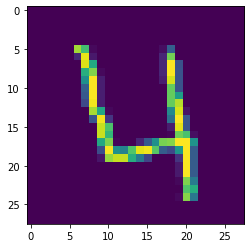

In [8]:
#viewing the 4th row of train_data
a=train_data.iloc[3,1:].values
a=a.reshape(28,28)
plt.imshow(a)

In [9]:
#Label of 4th row
train_data.iloc[3,0]

4

Using Random Classifier to build a model to predict the output of test_data.

In [10]:
x=train_data.iloc[:,1:]
y=train_data.iloc[:,0]

In [11]:
#Creating training and testing samples from train_data with a ratio of 7:3(train:test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [12]:
model=RandomForestClassifier(n_estimators=200,max_samples=0.5)
model.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=200)

In [13]:
#Predicting the testing sample of train_data
pred=model.predict(x_test)

In [14]:
#accuracy of training sample of train_data
model.score(x_train,y_train)

0.9989115276029797

In [15]:
#accuracy of testing sample of train_data
model.score(x_test,y_test)

0.9573049757955718

In [16]:
confusion_matrix(pred,y_test)

array([[1185,    1,    7,    6,    2,    5,   10,    1,    2,    6],
       [   0, 1373,    6,    2,    0,    2,    3,    8,   11,    3],
       [   2,    5, 1231,   17,    1,    2,    1,   22,    5,    4],
       [   1,    3,    7, 1255,    0,   15,    0,    1,   14,   23],
       [   1,    1,   13,    2, 1181,    1,    3,    8,    6,   12],
       [   1,    2,    1,   25,    0, 1032,    9,    0,   11,    4],
       [   5,    2,    8,    5,    8,   13, 1224,    0,    7,    2],
       [   0,    1,   11,   14,    2,    0,    0, 1286,    2,   10],
       [   4,    1,    9,   15,    5,    8,    6,    2, 1138,    9],
       [   1,    0,    1,   14,   24,    7,    0,   31,   13, 1158]],
      dtype=int64)

In [17]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1225
           1       0.99      0.98      0.98      1408
           2       0.95      0.95      0.95      1290
           3       0.93      0.95      0.94      1319
           4       0.97      0.96      0.96      1228
           5       0.95      0.95      0.95      1085
           6       0.97      0.96      0.97      1274
           7       0.95      0.97      0.96      1326
           8       0.94      0.95      0.95      1197
           9       0.94      0.93      0.93      1249

    accuracy                           0.96     12601
   macro avg       0.96      0.96      0.96     12601
weighted avg       0.96      0.96      0.96     12601



crosscheck 5 values from the testing sample of train_data with predicted data

In [18]:
#first 5 values of testing sample of train_data
y_test[0:5]

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [19]:
#first 5 values of predicting samples
pred[0:5]

array([8, 1, 9, 9, 8], dtype=int64)

Predicting the output for the test_data

In [20]:
prediction=model.predict(test_data)
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
prediction.shape

(28000,)

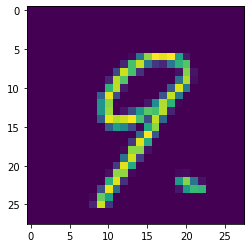

In [22]:
#Visualizing the 3rd row of test_data
b=test_data.iloc[2,0:].values
b=b.reshape(28,28)
plt.imshow(b)

In [23]:
#The 3rd value of prediction data
prediction[3]

9

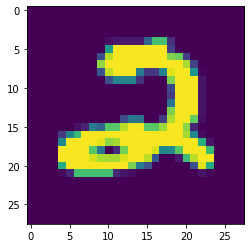

In [24]:
#Visualizing the 1st row of test_data
b1=test_data.iloc[0,0:].values
b1=b1.reshape(28,28)
plt.imshow(b1)

In [25]:
#1st value of prediction data
prediction[0]

2

Wrongly predicted values and visualize the input digit

Predicted 5 as 3


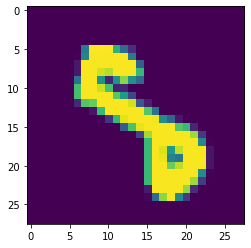

In [26]:
print("Predicted "+ str(y_test.iloc[np.where(y_test!=pred)[0][3]]) + " as "+str(pred[np.where(y_test!=pred)[0][3]]) )
plt.imshow(np.array(x_test.iloc[np.where(y_test!=pred)[0][3]]).reshape(28,28))

Here 5 is assumed to be 3 by the model as the actual 5 learned by the model can be seen below:

In [27]:
np.where(train_data['label']==5)

(array([    8,    19,    51, ..., 41942, 41987, 41989], dtype=int64),)

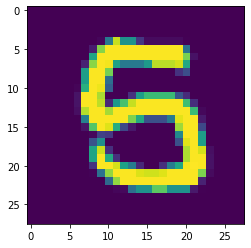

In [28]:
b=train_data.iloc[51,1:].values
b=b.reshape(28,28)
plt.imshow(b)